<a href="https://colab.research.google.com/github/RodrigoWeiss/AirBnB/blob/main/Projeto_Airbnb_Rodrigo_WEISS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto AirBnB - Rodrigo Weiss

# Análise dos Dados do Airbnb - **Los Angeles-EUA**
O [Airbnb](https://) já é considerado como sendo a maior empresa hoteleira da atualidade. Ah, o detalhe é que ele não possui nenhum hotel!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](https://), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Analisando Airbnb
Neste notebook, iremos analisar os dados referentes à cidade de **Los Angeles nos EUA**, e ver quais insights podem ser extraídos a partir de dados brutos.

### Obtenção de dados

In [ ]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo .csv para o dataframe

df=pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2022-12-06/visualisations/listings.csv')

## Análise de dados

In [ ]:
# Mostrar as 3 primeiras linhas para entender o dataset

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN


DICIONÁRIO DE VARIÁVEIS --> Para melhor entender o dataset, o dicionário abaixo foi adicionado à análise:

*   **id** - número de id gerado para identificar o imóvelItem da lista
*  ** name** - nome da propriedade anunciada
*   **host_id** - número de id do proprietário (anfitrião) da propriedade
*   **host_name** - Nome do anfitrião
*   **neighbourhood_group** - esta coluna não contém nenhum valor válido
*   **neighbourhood** - nome do bairro
*   **latitude** - coordenada da latitude da propriedade
*   **longitude** - coordenada da longitude da propriedade
*   **room_type** - informa o tipo de quarto que é oferecido
*   **price** - preço para alugar o imóvel
*   **minimum_nights** - quantidade mínima de noites para reservar
*   **number_of_reviews** - número de reviews que a propriedade possui
*   **last_review** - data do último review
*   **reviews_per_month** - quantidade de reviews por mês
*   **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
*   **availability_365** - número de dias de disponibilidade dentro de 365 dias
*   **License** - Número da licensa do anfitrião

### Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos de variáveis?

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [ ]:
# Identificar o volume de dados do DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}\n'.format(df.shape[1]))

#Verificas as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	40438
Variáveis:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### Q2.Qual a porcentagem de valores ausentes no *dataset?*



In [ ]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))*100

license                           74.622879
reviews_per_month                 26.175874
last_review                       26.175874
host_name                          0.004946
name                               0.004946
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

#### A análise dos valores nulos mostra o seguinte resultado:
1.  Os valores para "License" possuem quase 75% dos valores nulos;
2.  Os valores para "review_per_month" e "last_review" apresentam as mesmas quantidade de valores nulos, correspondentes à mais de 25%

### Q3. Qual o tipo de distribuição das variáveis?

Para identificar a distribuição das variáveis, irei plotar o histograma

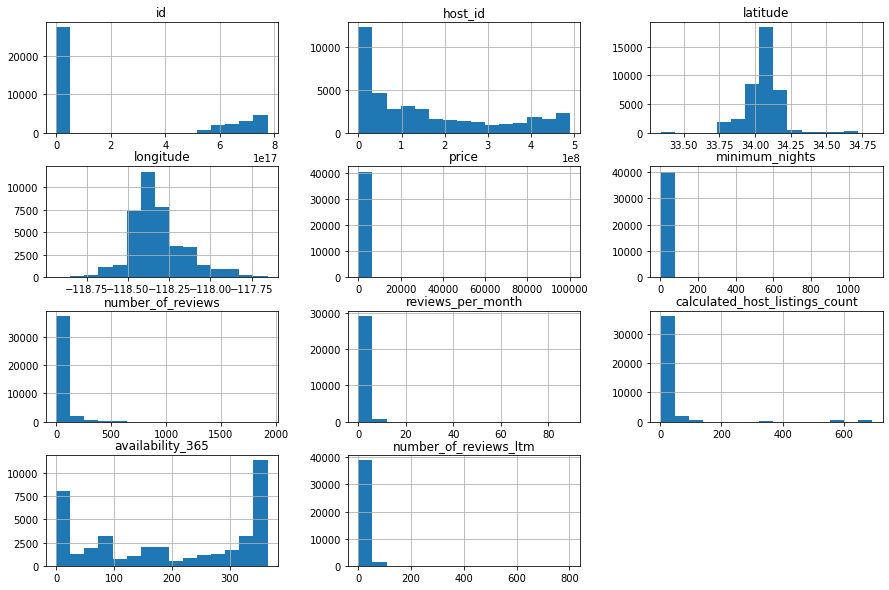

In [ ]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### Q4. Há *Outliers* presentes?

Para a distribuição do histograma, é possível verificar indícios da presença de outliers. Olhando por exemplo as variáveis `price`, `minimun nights`,`Id`, `Number_of_reviews_ltm` e `calculated_host_listings_count`. Como a informação `Id`não representa valores para a análise estatística, irei desconsidera-lo por enquanto.

Os valores não seguem umas distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

*   Resumo estatístico por meio do método `describe()`
*   Plotar `boxplots` para a variável.



In [ ]:
#Ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights','number_of_reviews','reviews_per_month',
    'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40438.000000,40438.000000,40438.000000,29853.000000,40438.000000,40438.000000
mean,279.449602,18.700653,33.562021,1.499085,32.550126,198.164969
std,1136.463147,30.973639,72.691163,1.866809,114.678176,142.646899
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000,0.000000,0.240000,1.000000,62.000000
50%,138.000000,30.000000,5.000000,0.800000,2.000000,190.000000
75%,235.000000,30.000000,31.000000,2.250000,10.000000,348.000000
max,99999.000000,1124.000000,1924.000000,89.000000,693.000000,365.000000


Analisando o resumo acima, temos a seguinte situação:

1. 75% dos valores para `price` estão abaixo de 235, enquanto o valor máximo é de 999999.000;

2. A quantidade máxima para `minimum_nights`é de 1124 noites, muito acima de 365 (1 ano completo);

3. A quantidade máxima de `calculated_host_listings_count` é de 693, sendo que 75% dos holst possui menos de 10 propriedades.

####Boxplot para minimum_nights

minimum_nights: valores acima de 31:
727 entradas
1.7978%


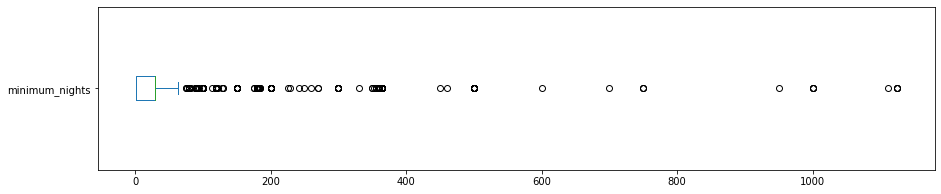

In [ ]:
# Aplicando Boxplot para Minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

# Ver a quantidade de valores acimas de 30 dias para minimum_nights
print('minimum_nights: valores acima de 31:')
print('{} entradas'.format(len(df[df.minimum_nights > 31])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 31])/df.shape[0])*100))

Utilizando o valor de 30 noites mínima, 12,72% estão acima deste valor. Ao utilizar o valor de 31 (apenas 1 noite a mais) noites mínimas, o percentual passa a ser de ** 1,79%**. Neste caso, apenas 1 noite tem um efeito grande na análise --> `Pergunta: porque esta diferença??`


####Boxplot para price

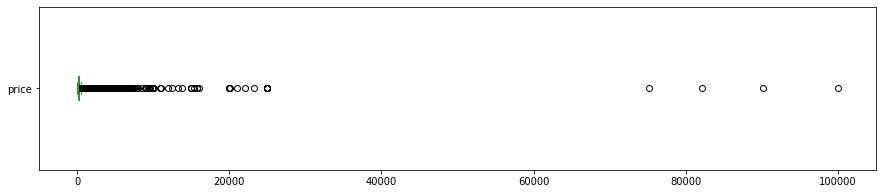


price: valores acima de 1750
704 entradas
1.7409%


In [ ]:
# Aplicando Boxplot para price

df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Ver quantidade de valores acima de 1500 para price
print('\nprice: valores acima de 1750')
print('{} entradas'.format(len(df[df.price>1750])))
print('{:.4f}%'.format((len(df[df.price>1750])/df.shape[0]*100)))

#df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

####Histograma sem os outliers

Como identificamos os outliers em 'Minimum_nights' e 'Price', agora vamos limpar o Dataframe e plotar novamente o histograma

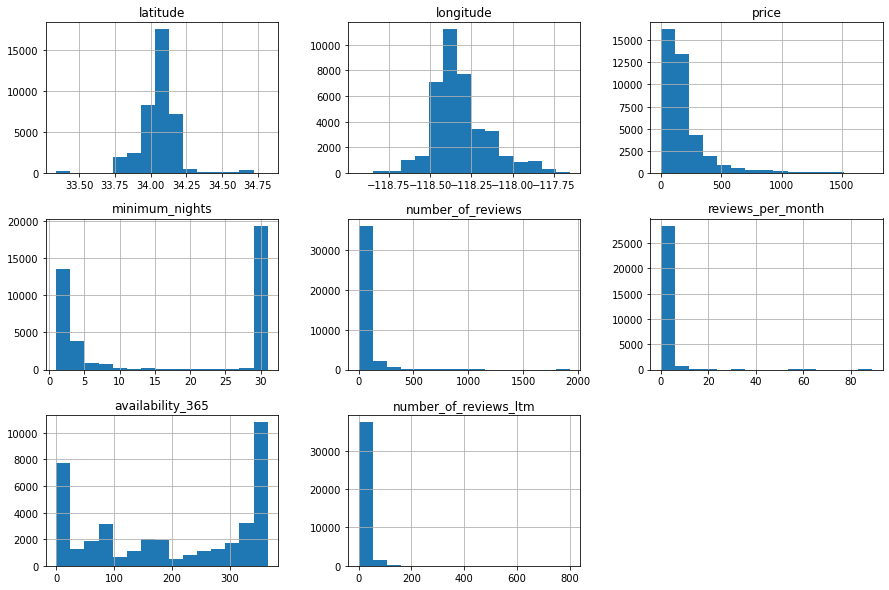

In [ ]:
 # Remover os 'outliers' em um novo Dataframe

 df_clean=df.copy()
 df_clean.drop(df_clean[df_clean.price > 1750].index, axis=0, inplace=True)
 df_clean.drop(df_clean[df_clean.minimum_nights > 31].index, axis=0, inplace=True)

 # Remover "neighbourhood_group" pois está vazio
 df_clean.drop('neighbourhood_group', axis=1, inplace=True)

 # Remover "calculated_host_listings_count" para ter um histograma mais limpo
 df_clean.drop('calculated_host_listings_count', axis=1, inplace=True)

 # Remover "host_id" para ter um histograma mais limpo, não acredito que seja um valor importante
 df_clean.drop('host_id', axis=1, inplace=True)

 # Remover 'id' para ter um histograma mais limpo e considerando que este item tem + de 70% de valores ausentes
 df_clean.drop('id', axis=1, inplace=True)

 #Plotar histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Interessante perceber no gráfico de "minimum_nighs", uma grande parcela dos valores se encontra no "30" --> *Insite*: `Possivelmente as pessoas em Los Angeles costumam alugar mensalmente, assim como fazemos no Brasil porém por imobiliárias`

### Q5. Qual a correlação existente entre as variáveis

,price,minimum_nights,latitude,longitude
price,1.000000,-0.107320,-0.030327,-0.219260
minimum_nights,-0.107320,1.000000,0.025809,-0.267133
latitude,-0.030327,0.025809,1.000000,-0.086046
longitude,-0.219260,-0.267133,-0.086046,1.000000


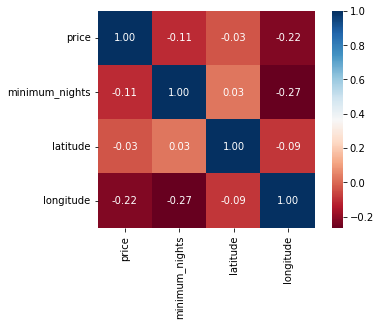

In [ ]:
# Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'latitude', 'longitude']].corr()
display(corr)
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

### Q6. Qual o tipo de imóvel mais alugado no AirBnB?

Vamos analisar a coluna "room_type" que indica o tipo de acomodação alugada (lugar inteiro, quarto inteiro, hotel)

In [ ]:
# Mostrar a quantidade por tipo de acomodação
df_clean.room_type.value_counts()

Entire home/apt    27195
Private room       10978
Shared room          769
Hotel room            78
Name: room_type, dtype: int64

In [ ]:
# Mostrar a porcentagem de cada tipo de acomodação
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    69.695028
Private room       28.134290
Shared room         1.970784
Hotel room          0.199897
Name: room_type, dtype: float64

### Q7. Qual a localidade mais cara em Los Angeles, CA?

In [ ]:
# Verificar a localização (Neighbourhood) mais cara de Los Angeles utilizando groupby()

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Malibu                                   705.582524
Bel-Air                                  578.951220
Beverly Crest                            567.314050
Hollywood Hills West                     555.069196
Unincorporated Santa Monica Mountains    511.310127
Westlake Village                         449.888889
Pacific Palisades                        448.579618
Palos Verdes Estates                     426.368421
Hidden Hills                             414.000000
Avalon                                   408.958974
Name: price, dtype: float64

In [ ]:
# Verificar a quantidade de imóveis nos 4 bairros mais caros

print(df_clean[df_clean.neighbourhood == 'Malibu'].shape)
print(df_clean[df_clean.neighbourhood == 'Bel-Air'].shape)
print(df_clean[df_clean.neighbourhood == 'Beverly Crest'].shape)
print(df_clean[df_clean.neighbourhood == 'Hollywood Hills West'].shape)

(309, 14)
(41, 14)
(121, 14)
(448, 14)


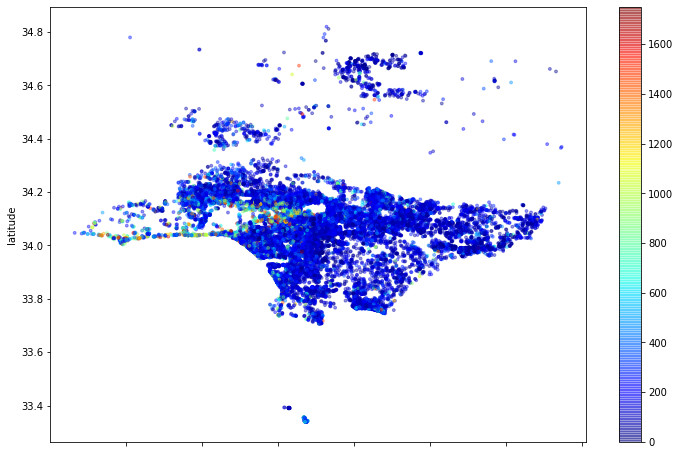

In [ ]:
# Plotar os imóveis pela latitude/longitude em função dos valores

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

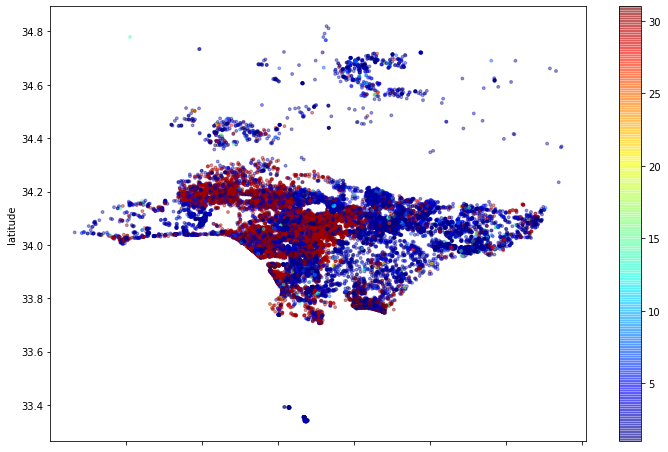

In [ ]:
# Plotar os imóveis pela latitude/longitude em função da quantidade de noites mínimas

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['minimum_nights'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));